<a href="https://colab.research.google.com/github/Morilla123/Curso/blob/main/prepros_doc_peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%%capture
!pip install opencv-python
!pip install easyocr
!pip install imutils
!pip install torch
!pip install imutils


In [16]:
!pip install opencv-python-headless=='4.1.2.30'
!pip list | grep open

     |████████████████████████████████| 21.8 MB 2.9 MB/s 
intel-openmp                  2021.4.0
opencv-contrib-python         4.1.2.30
opencv-python                 4.1.2.30
opencv-python-headless        4.1.2.30
openpyxl                      2.5.9
smart-open                    5.2.1


In [17]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [20]:
img = cv2.imread('texp_1.jpg')

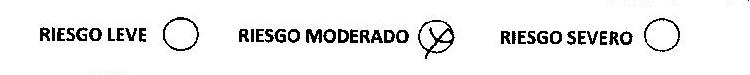

[[255 255 255 ... 255   9 251]
 [255 255 255 ... 235 242 255]
 [255 255 255 ... 255 255 250]
 ...
 [255 255 255 ... 255 255 255]
 [253 253 253 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [85]:
# cargar, pasar a grises y seccionar imagen
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray1[700:900,250:1000])

cv2_imshow(gray1[785:860,250:1000])
items=gray1[785:860,250:1000]
print(items)

# loc eadges and noise reduction


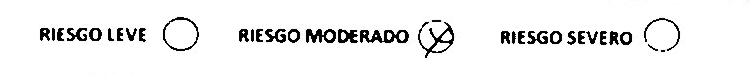

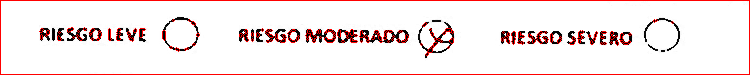

[[[ -1  -1   1  -1]
  [  2  -1  -1   0]
  [  3   1  -1   0]
  [  4   2  -1   0]
  [  5   3  -1   0]
  [  6   4  -1   0]
  [  7   5  -1   0]
  [  8   6  -1   0]
  [  9   7  -1   0]
  [ 10   8  -1   0]
  [ 11   9  -1   0]
  [ 12  10  -1   0]
  [ 13  11  -1   0]
  [ 14  12  -1   0]
  [ 15  13  -1   0]
  [ 16  14  -1   0]
  [ 17  15  -1   0]
  [ 18  16  -1   0]
  [ 19  17  -1   0]
  [ 20  18  -1   0]
  [ 21  19  -1   0]
  [ 22  20  -1   0]
  [ 23  21  -1   0]
  [ 24  22  -1   0]
  [ 25  23  -1   0]
  [ 26  24  -1   0]
  [ 27  25  -1   0]
  [ 28  26  -1   0]
  [ 29  27  -1   0]
  [ 30  28  -1   0]
  [ 31  29  -1   0]
  [ 32  30  -1   0]
  [ 33  31  -1   0]
  [ 34  32  -1   0]
  [ 35  33  -1   0]
  [ 36  34  -1   0]
  [ 37  35  -1   0]
  [ 38  36  -1   0]
  [ 39  37  -1   0]
  [ 40  38  -1   0]
  [ 41  39  -1   0]
  [ 42  40  -1   0]
  [ 43  41  -1   0]
  [ 44  42  -1   0]
  [ 45  43  -1   0]
  [ 46  44  -1   0]
  [ 47  45  -1   0]
  [ 48  46  -1   0]
  [ 49  47  -1   0]
  [ 50  48  -1   0]


In [98]:
# preproceso
# itemsBlured = cv2.bilateralFilter(items, 20, 370, 370)
# itemsBlured = cv2.GaussianBlur(items, (5,5), 50)
itemsBlured = cv2.medianBlur(items, 3gfujjsjsksdfs)
cv2_imshow(itemsBlured)

# busqueda de contornos
cont,jerarq=cv2.findContours((itemsBlured, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2_imshow(cv2.drawContours(cv2.cvtColor(itemsBlured.copy(),cv2.COLOR_GRAY2BGR), cont, -1, (0,0,255), 1))

print(jerarq)

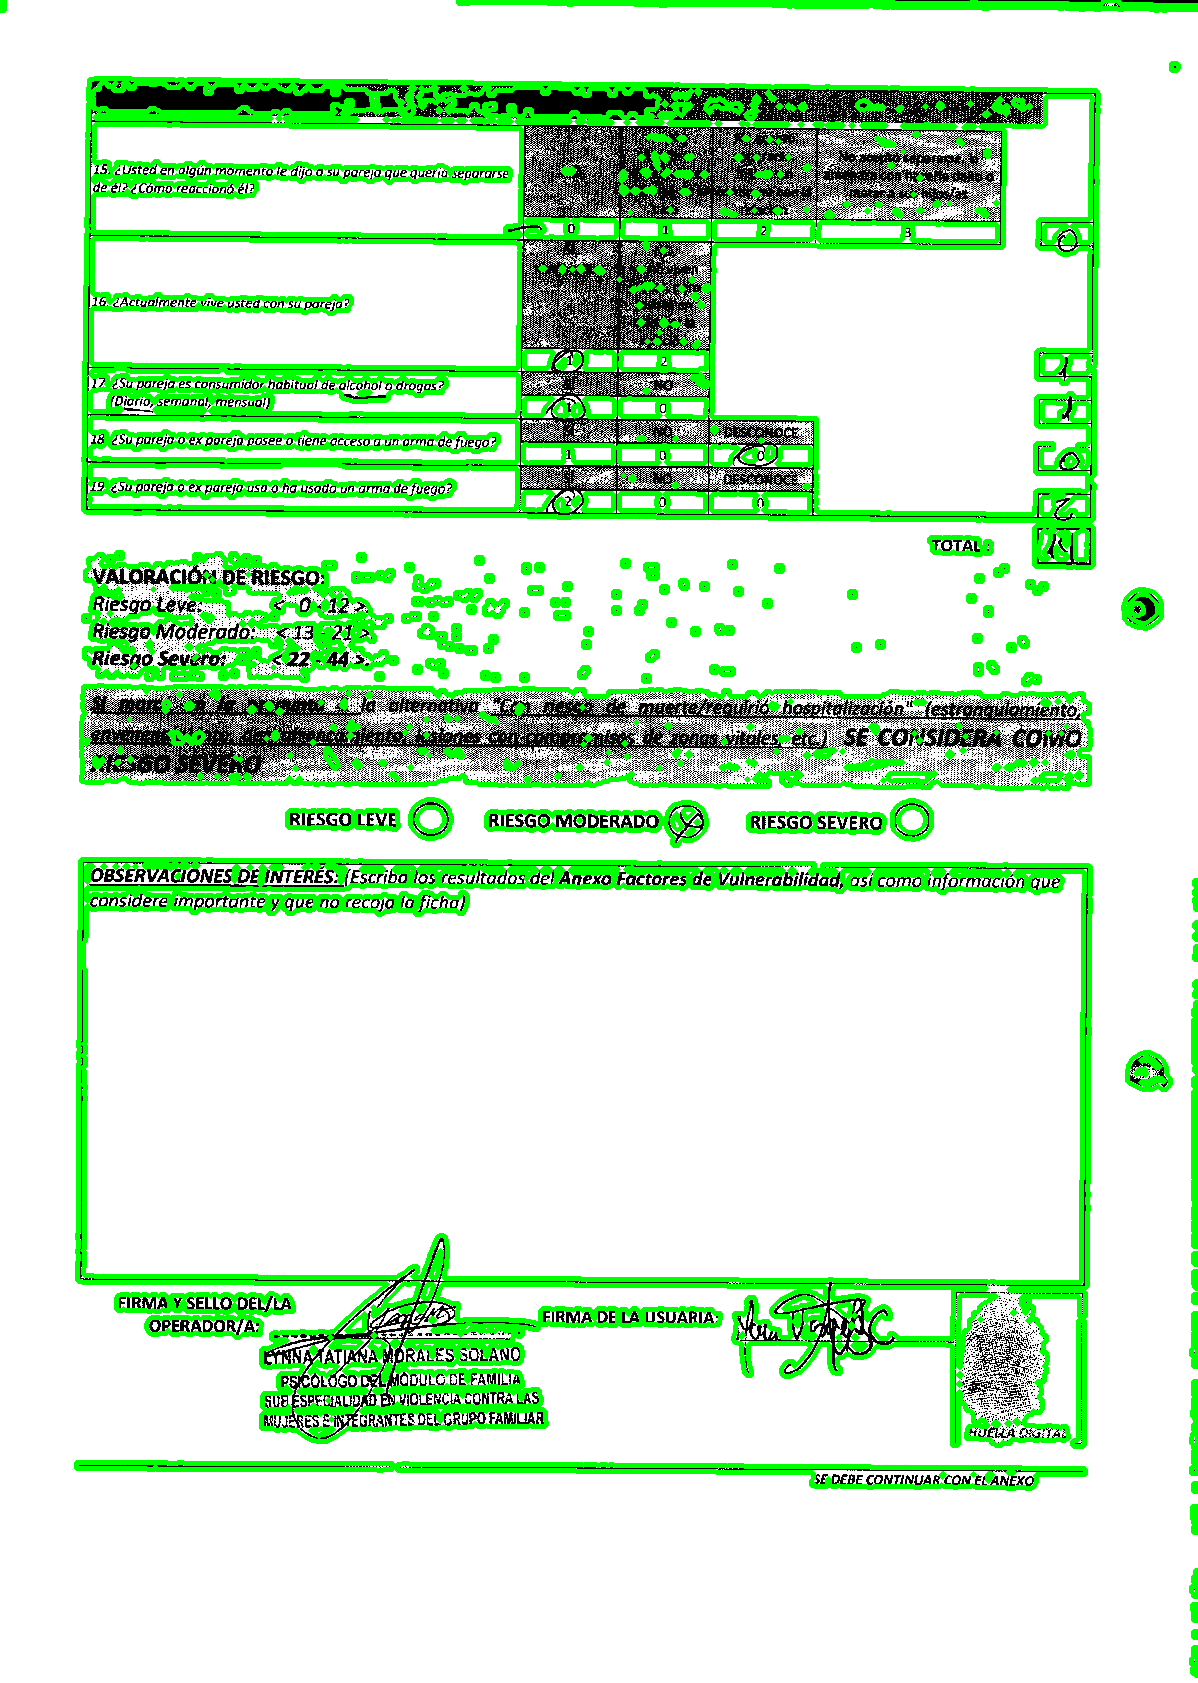

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edg = cv2.Canny(bfilter, 30, 200) #Edge detection
edg = cv2.dilate(edg.copy(), None,iterations=2)
cnts, hierarchy = cv2.findContours(edg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2_imshow(cv2.drawContours(img, cnts[5], -1, (0,255,0), 3))

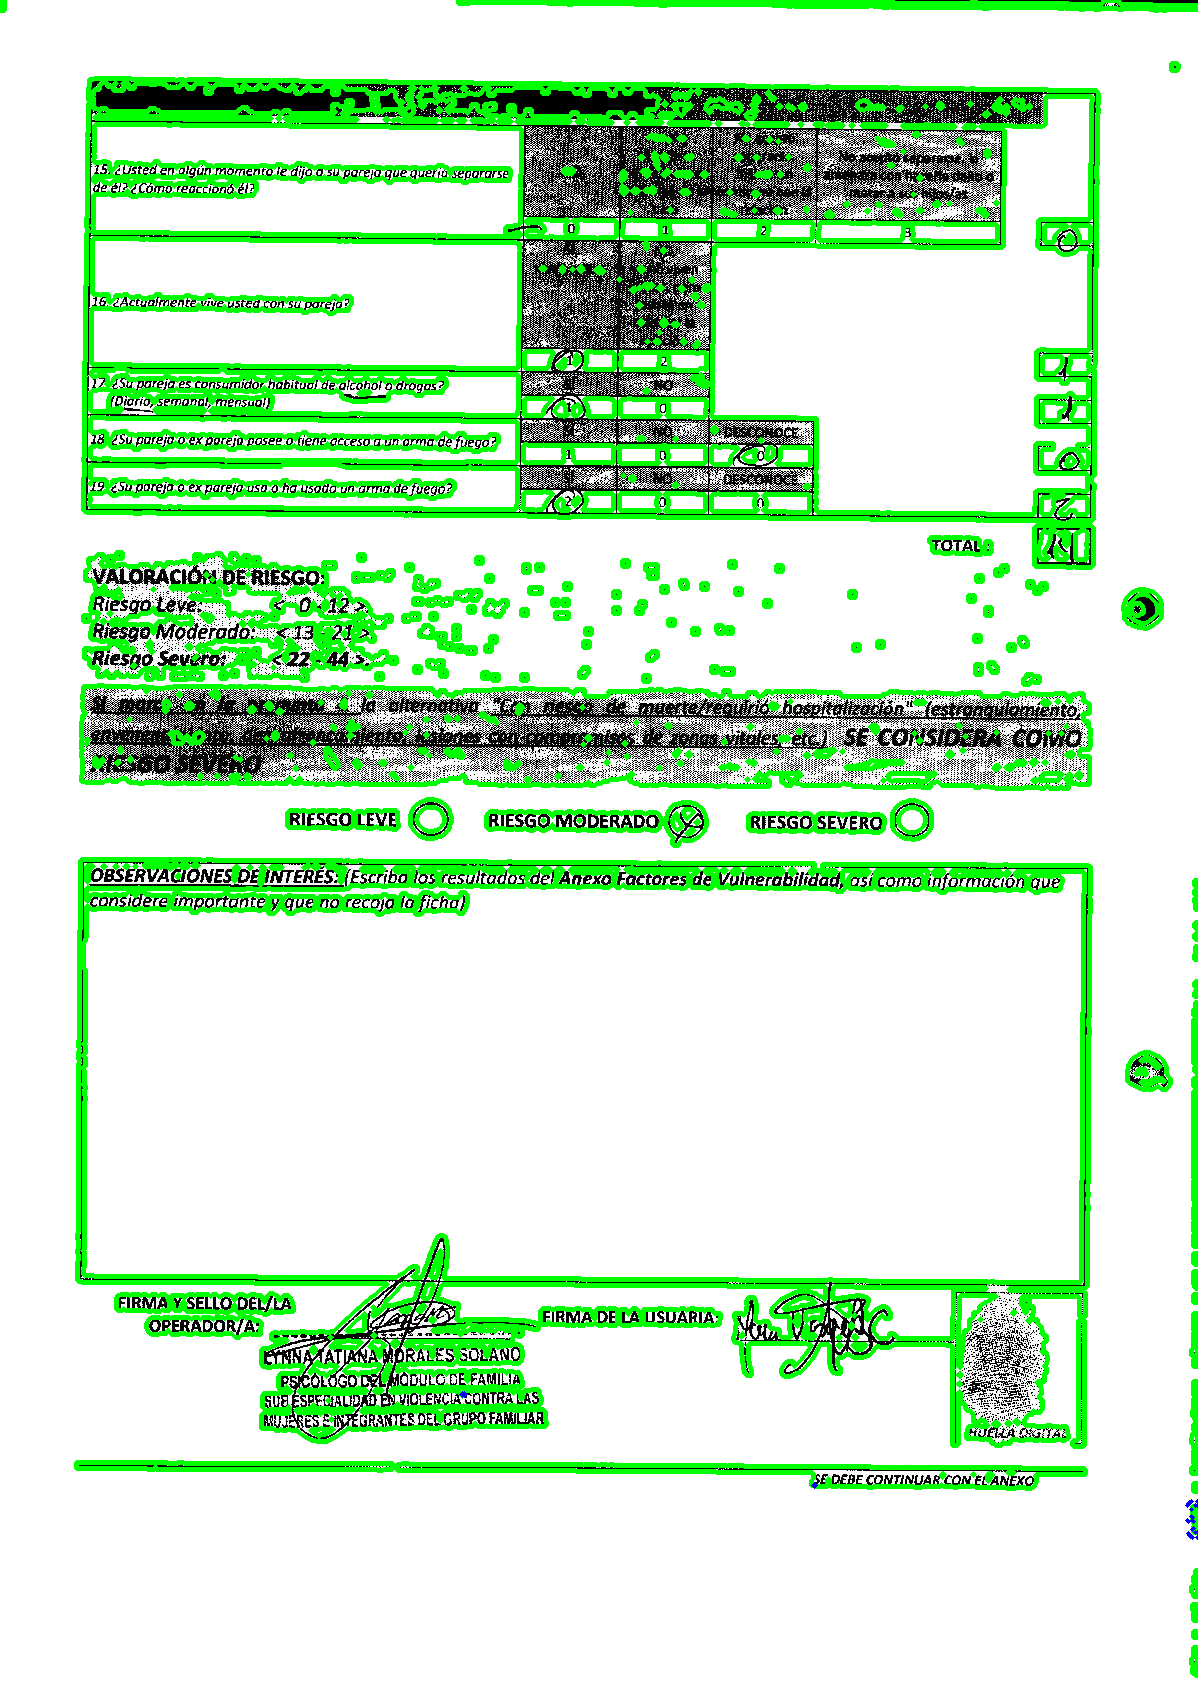

In [ ]:
cv2_imshow(cv2.drawContours(img, cnts[50], -1, (255,0,0), 3))

area= 747178.0
area= 452827.0


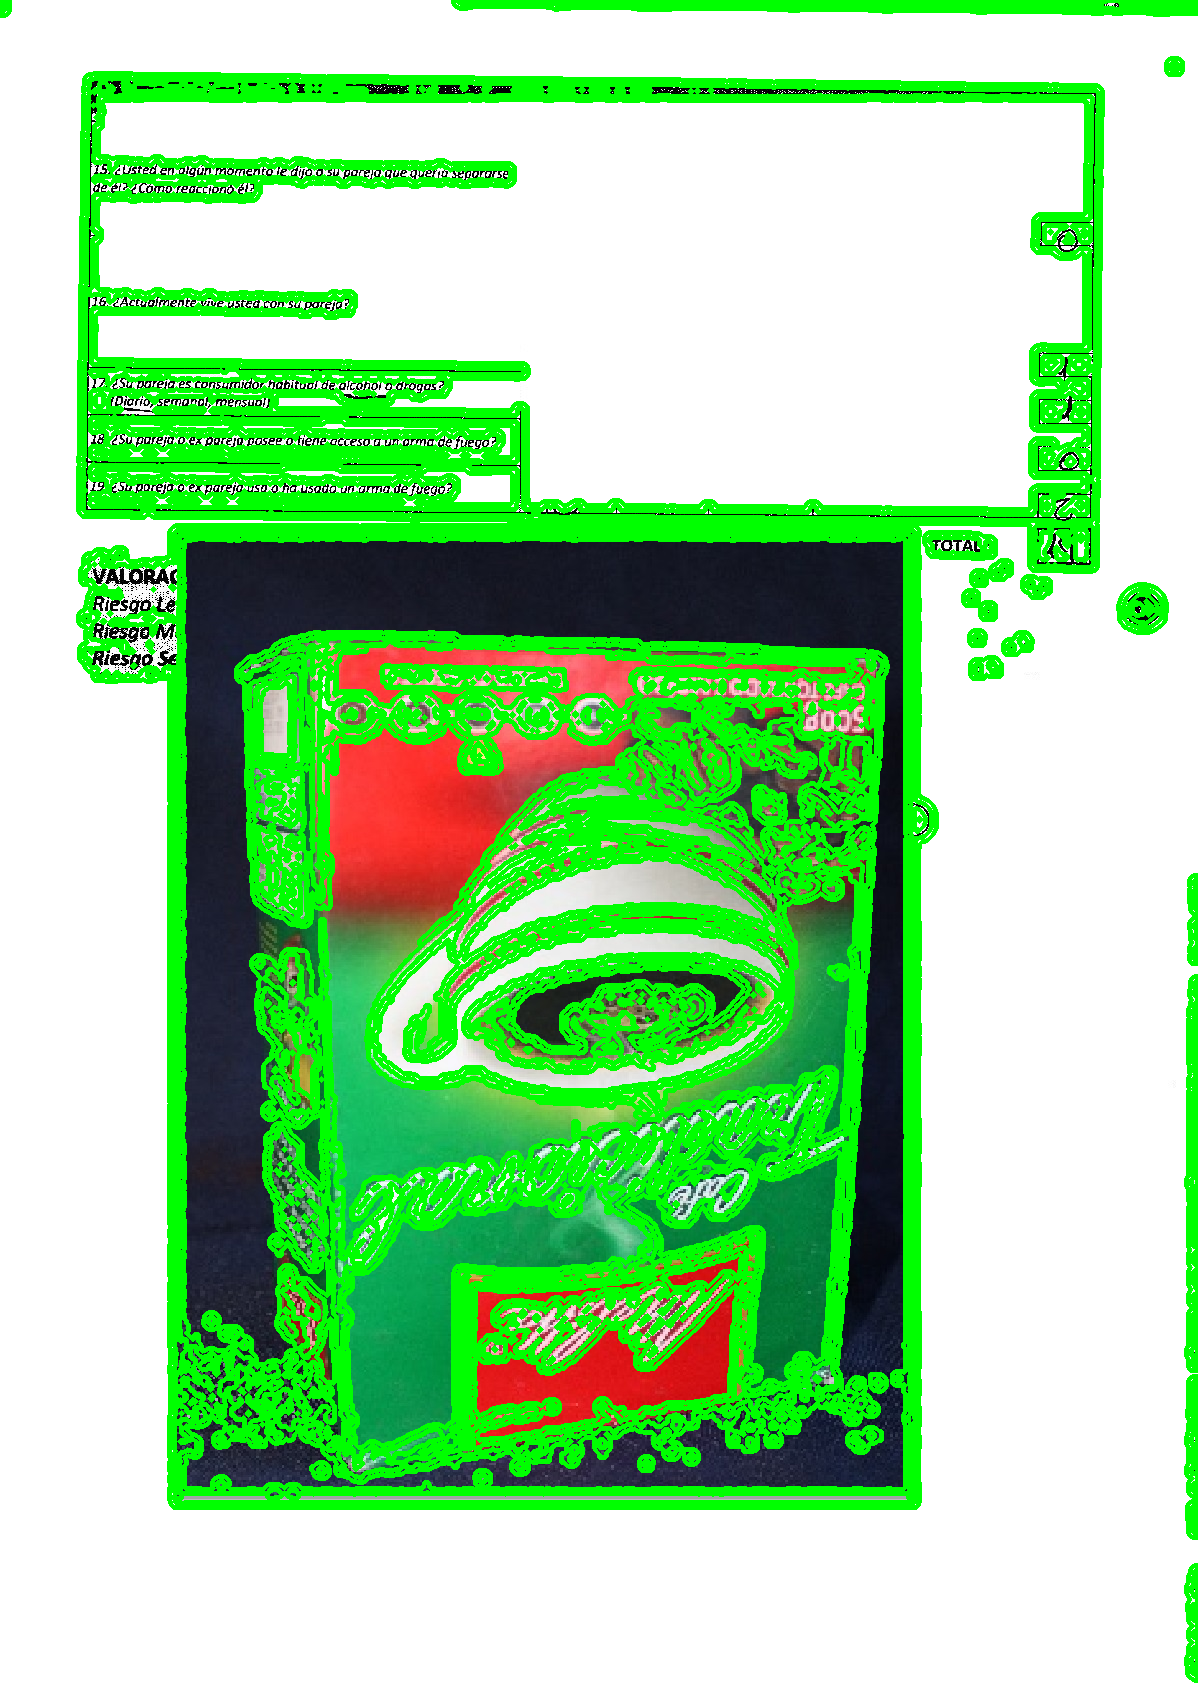

In [ ]:
image = img
for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  
  if len(approx)==4 and area>9000:
    print('area=',area)
    #cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    if aspect_ratio>2.4:
      placa = gray[y:y+h,x:x+w]
      text = pytesseract.image_to_string(placa,config='--psm 11')
      print('PLACA: ',text)
      cv2.imshow('PLACA',placa)
      cv2.moveWindow('PLACA',780,10)
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)
      
cv2_imshow(image)

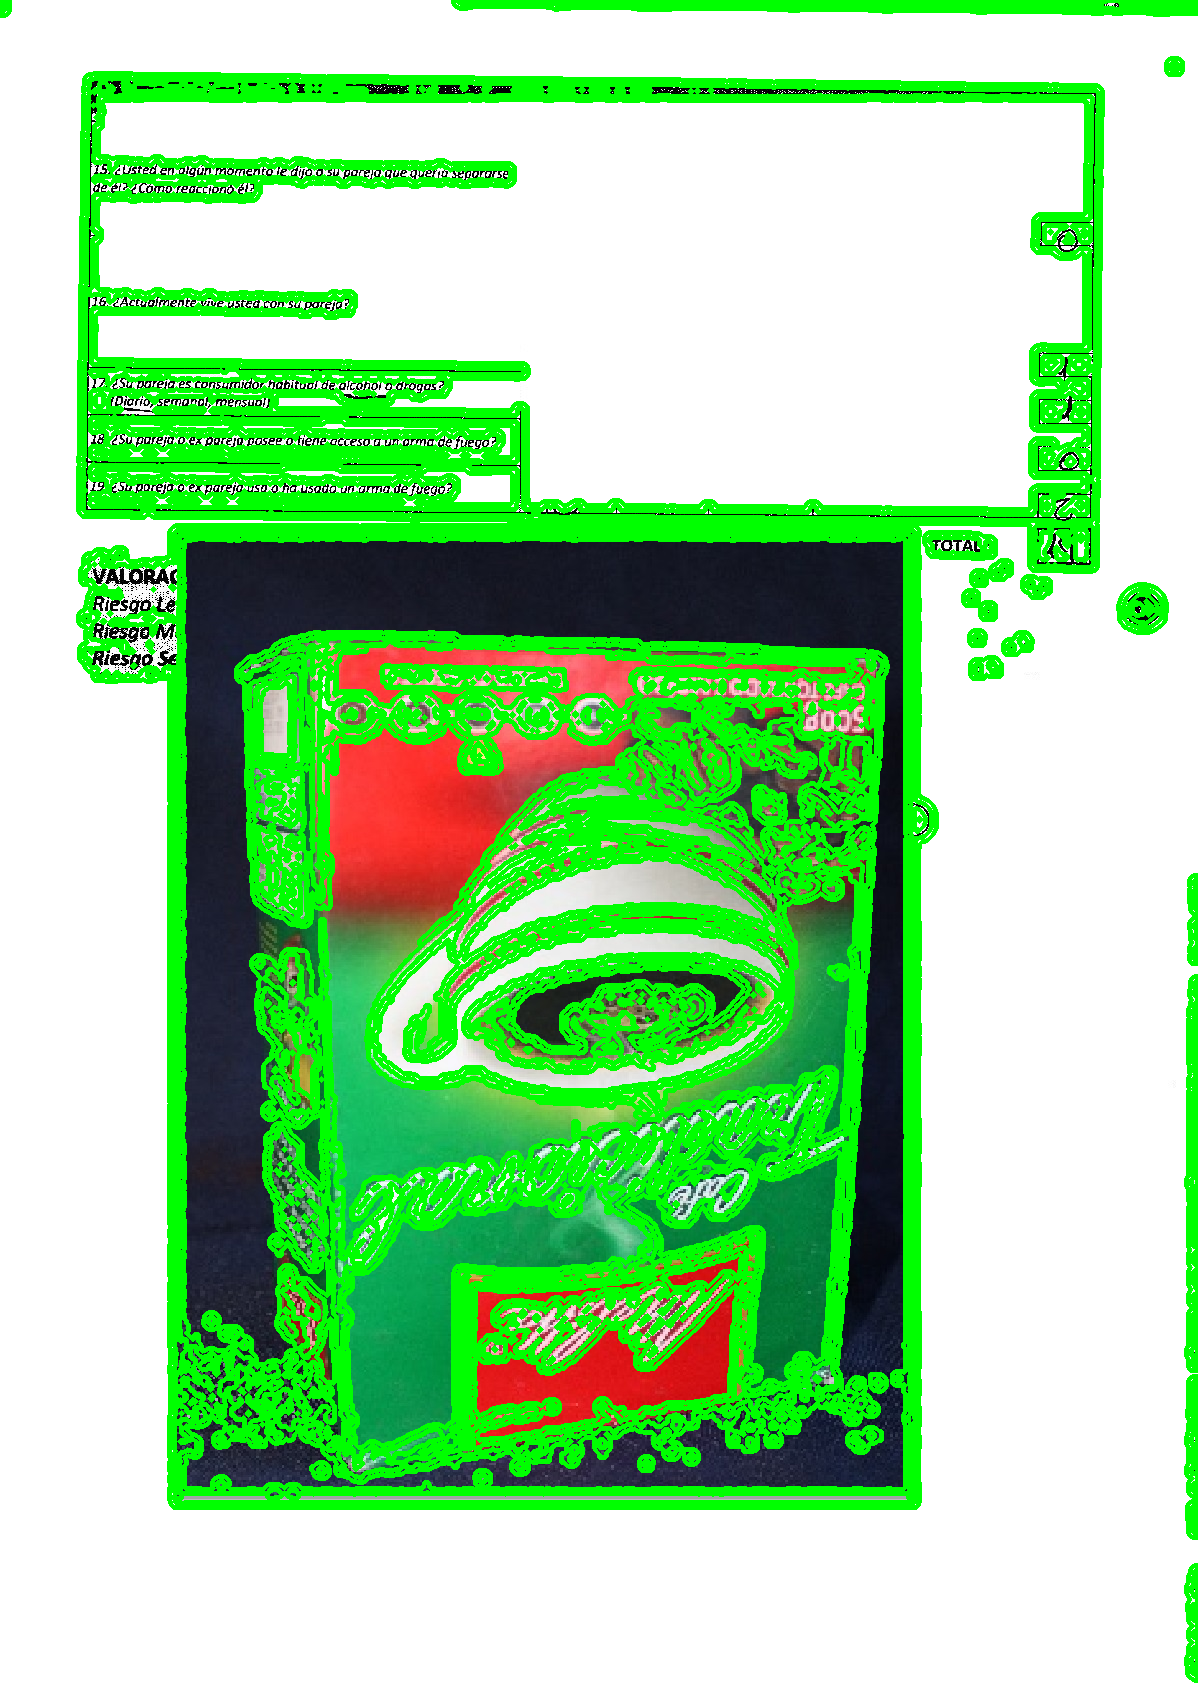

In [ ]:
cv2_imshow(image)

In [ ]:
bfilter1 = cv2.bilateralFilter(gray1, 11, 17, 17) #Noise reduction
edged1 = cv2.Canny(bfilter1, 30, 200) #Edge detection
cv2_imshow(edged1)

In [ ]:
bfilter2 = cv2.bilateralFilter(gray2, 11, 17, 17) #Noise reduction
edged2 = cv2.Canny(bfilter2, 30, 200) #Edge detection
cv2_imshow(edged2)

In [ ]:
edges1 = cv2.dilate(edged1.copy(), None,iterations=5)
cv2_imshow(edged1)

In [ ]:
edges2 = cv2.dilate(edged2, None,iterations=2)
cv2_imshow(edged2)

In [ ]:
contours1, hierarchy1 = cv2.findContours(edged1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(edged2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cv2_imshow(cv2.drawContours(img1, contours1, -1, (0,255,0), 3))

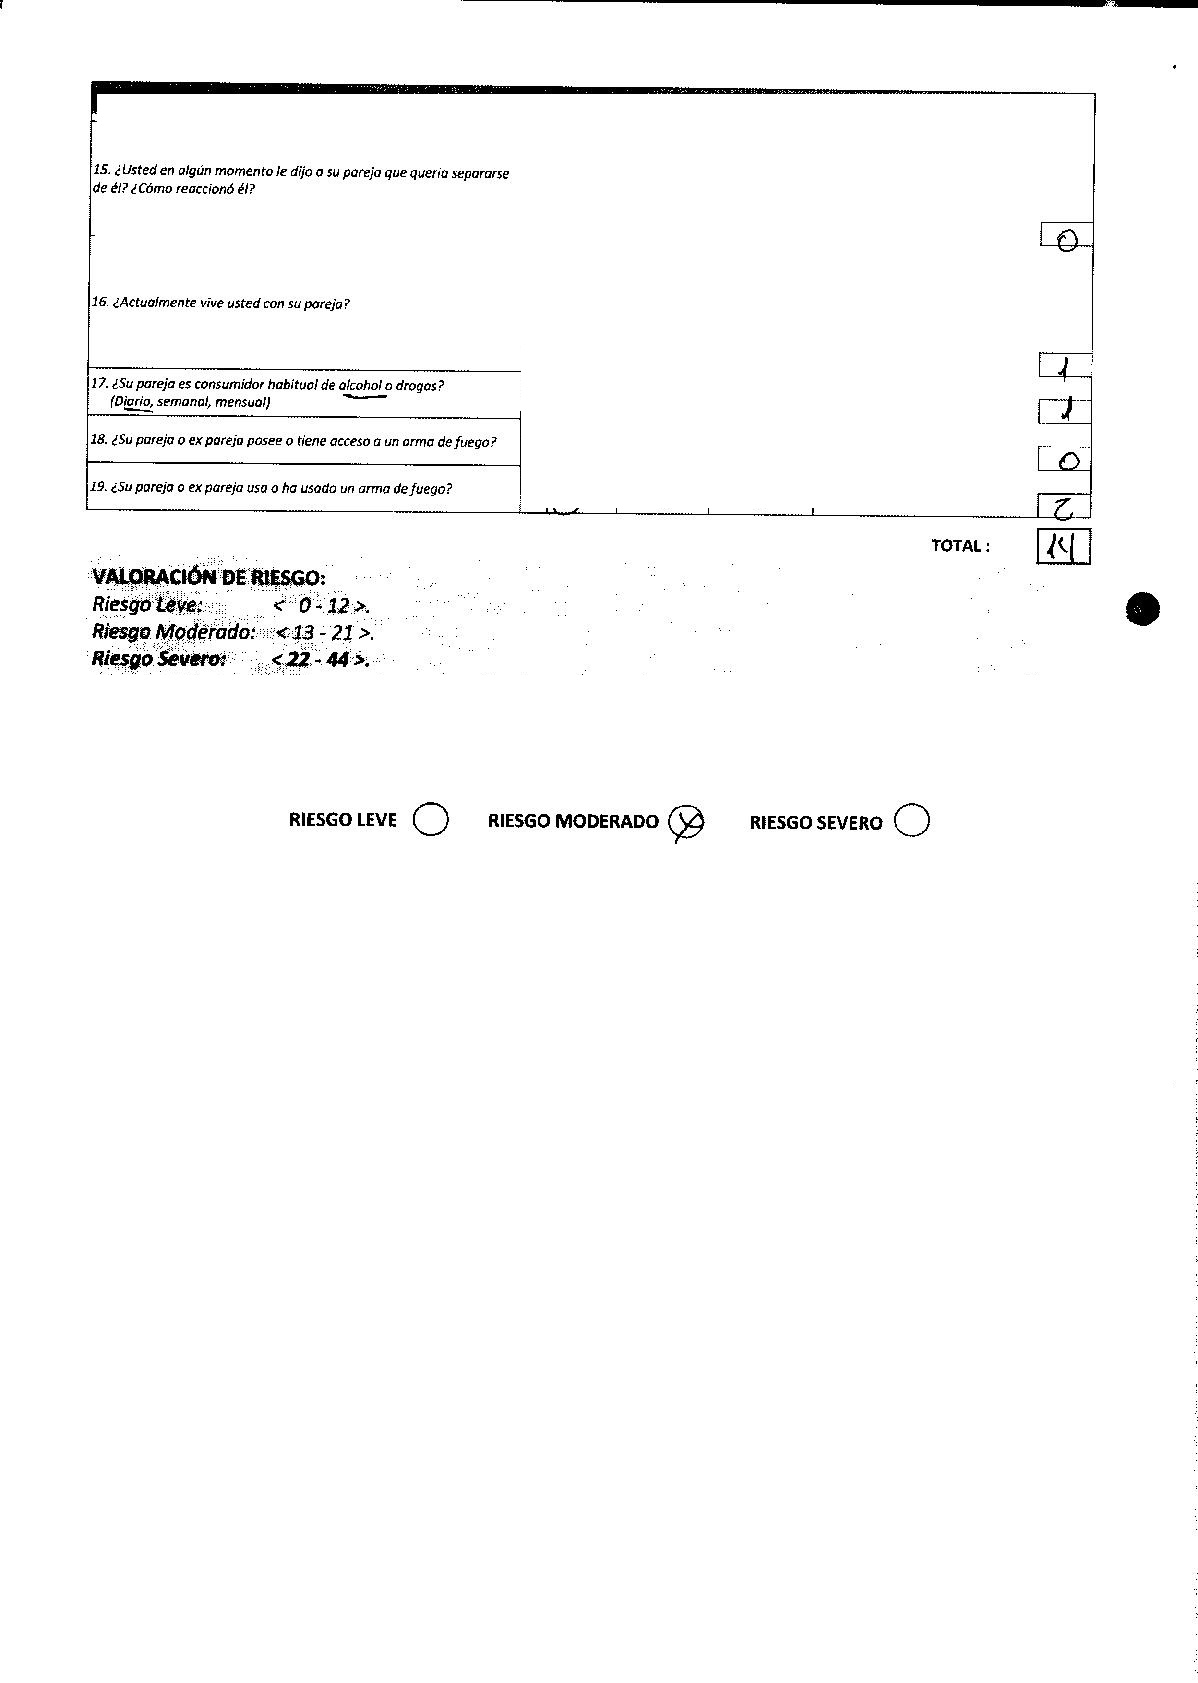

In [ ]:
cv2_imshow(cv2.drawContours(img2, contours2, -1, (0,255,0), 3))

In [ ]:
contours2

[]

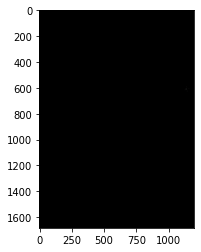

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
ti = 1e-6
Ttotalnom = 1e-3
p = 255
T1 = (3*p-1)*ti
# T1
m=131
T2 = m*(T1+5*ti)-ti
T2

0.100738